In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd

In [ ]:
data = yf.download('AAPL', start='2015-01-01', end='2023-01-01')


[*********************100%***********************]  1 of 1 completed


In [ ]:
data.to_csv('AAPL_stock_data.csv')

In [ ]:
data = pd.read_csv('AAPL_stock_data.csv')

In [ ]:
data = data[['Open', 'High', 'Low', 'Close', 'Volume']]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


In [ ]:
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

In [ ]:
import numpy as np

def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y) # np is now defined within this scope

time_step = 60
X, y = create_dataset(scaled_data, time_step)

In [ ]:
train_size = int(len(X) * 0.80)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

In [ ]:
pip install tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
model.fit(X_train, y_train, batch_size=64, epochs=10)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0262
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0012
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 3.5523e-04
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - loss: 3.1188e-04
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 3.0385e-04
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 2.9915e-04
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 3.4483e-04
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 3.1278e-04
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 2.7229e-04
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - loss: 2.6104e-04


In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [ ]:
# Reshape train_predict and test_predict to have the same number of features
# as the original data used to fit the scaler. Assuming the original data had 5 features:

train_predict_dataset_like = np.zeros(shape=(len(train_predict), 5))
# Create an empty array with the correct shape
train_predict_dataset_like[:,0] = train_predict[:,0]
# Assign the predictions to the first column
train_predict = scaler.inverse_transform(train_predict_dataset_like)[:,0]
# Inverse transform and extract the first column

# Repeat for test_predict
test_predict_dataset_like = np.zeros(shape=(len(test_predict), 5))
test_predict_dataset_like[:,0] = test_predict[:,0]
test_predict = scaler.inverse_transform(test_predict_dataset_like)[:,0]



In [ ]:
import matplotlib.pyplot as plt

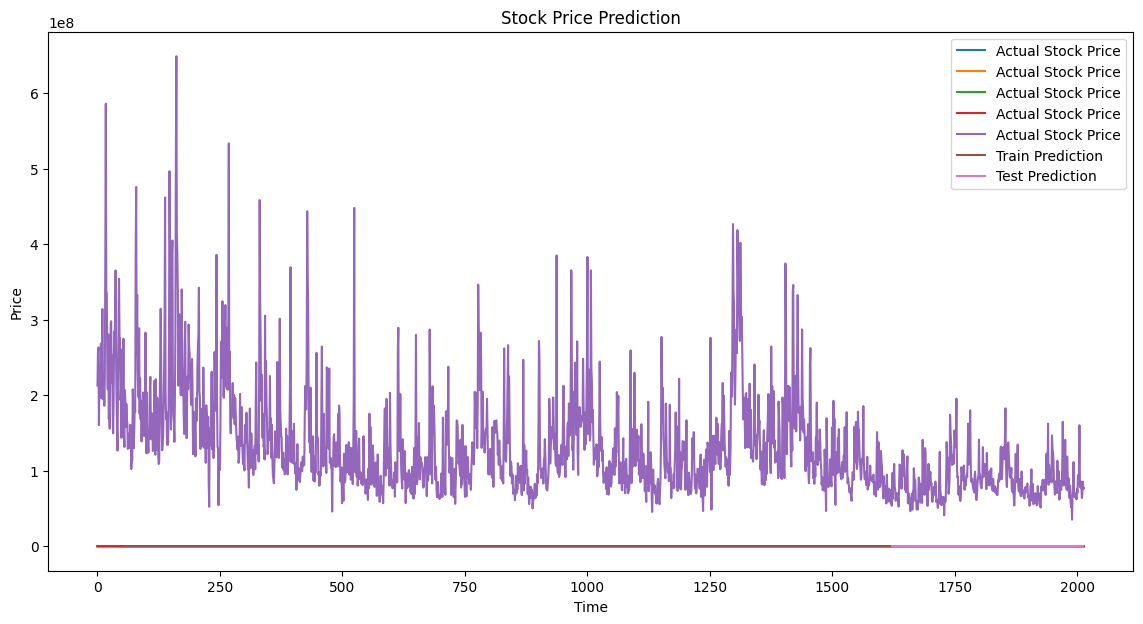

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(scaler.inverse_transform(scaled_data), label='Actual Stock Price')
plt.plot(np.arange(time_step, len(train_predict) + time_step), train_predict, label='Train Prediction')
# Calculate the correct x-axis range for the test prediction plot:
# It should start after the train prediction and have the same length as test_predict
test_plot_start = len(train_predict) + time_step  # Start after train prediction
test_plot_x = np.arange(test_plot_start, test_plot_start + len(test_predict))
plt.plot(test_plot_x, test_predict, label='Test Prediction') # use this x-axis range for test plot
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
import math

In [ ]:
train_rmse = math.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = math.sqrt(mean_squared_error(y_test, test_predict))

In [ ]:
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

Train RMSE: 63.50237790577278
Test RMSE: 152.443270289238
